<a href="https://colab.research.google.com/github/VictorSester/Database_inha_12224919/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 as sl
con = sl.connect('my-tes.db')

In [2]:
with con:
  con.execute("""
  CREATE TABLE USER (
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER
  );""")

In [3]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice',21),
    (2, 'Bob',22),
    (3, 'Chris',23),
]

In [4]:
with con:
  con.executemany(sql, data)

In [5]:
with con:
  data = con.execute("SELECT * FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id' : [1,1,2,2,3,3,3],
    'skill' : ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [7]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
SELECT s.user_id, u.name, u.age, s.skill
FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id''', con)
df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', con)

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [11]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [12]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [14]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [16]:
def dt (days):
  return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [17]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:13:33,24.309367445565748
2021-06-28 09:13:33,21.765132207411934
2021-06-29 09:13:33,25.430559509273003
2021-06-30 09:13:33,18.687542541036624
2021-07-01 09:13:33,22.919509474886276


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:13:33.509944,24.309367445565748
2021-06-28 09:13:33.509944,21.765132207411934
2021-06-29 09:13:33.509944,25.430559509273003
2021-06-30 09:13:33.509944,18.687542541036624
2021-07-01 09:13:33.509944,22.919509474886276
2021-07-02 09:13:33.509944,25.846918389528582
2021-07-03 09:13:33.509944,25.79467840293694
2021-07-04 09:13:33.509944,22.423798741211012
2021-07-05 09:13:33.509944,21.67344667617762
2021-07-06 09:13:33.509944,18.91125490747775


In [21]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:13:33.509944,24.309367445565748
2021-06-28 09:13:33.509944,21.765132207411934
2021-06-29 09:13:33.509944,25.430559509273003
2021-06-30 09:13:33.509944,18.687542541036624
2021-07-01 09:13:33.509944,22.919509474886276
2021-07-02 09:13:33.509944,25.846918389528582
2021-07-03 09:13:33.509944,25.79467840293694
2021-07-04 09:13:33.509944,22.423798741211012
2021-07-05 09:13:33.509944,21.67344667617762
2021-07-06 09:13:33.509944,18.91125490747775


In [22]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
AVG(Temperature) AS MEAN_TMP,
MAX(Temperature) AS MAX_TMP,
MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.710450109008804,25.84867707475634,18.075377770192226
2022,21.85683375955246,25.979818968995644,18.019475166203875


In [23]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:13:33', '2021-06-28 09:13:33',
               '2021-06-29 09:13:33', '2021-06-30 09:13:33',
               '2021-07-01 09:13:33', '2021-07-02 09:13:33',
               '2021-07-03 09:13:33', '2021-07-04 09:13:33',
               '2021-07-05 09:13:33', '2021-07-06 09:13:33',
               ...
               '2022-10-30 09:13:33', '2022-10-31 09:13:33',
               '2022-11-01 09:13:33', '2022-11-02 09:13:33',
               '2022-11-03 09:13:33', '2022-11-04 09:13:33',
               '2022-11-05 09:13:33', '2022-11-06 09:13:33',
               '2022-11-07 09:13:33', '2022-11-08 09:13:33'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

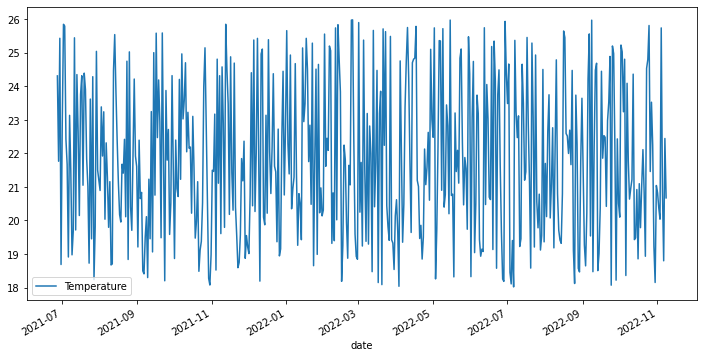

In [24]:
df.plot(figsize=(12, 6))